In [4]:
import pandas as pd 
from encodings.aliases import aliases

In [5]:
alias_values = set(aliases.values())
for encoding in set(aliases.values()):
    try:
        df=pd.read_csv("Listings.csv", nrows=10, encoding=encoding) # read in only 10 lines for faster read
        print('successful', encoding)
    except:
        pass

successful cp865
successful cp1256
successful mac_roman
successful cp855
successful cp1251
successful latin_1
successful iso8859_4
successful kz1048
successful cp857
successful cp850
successful mac_latin2
successful mbcs
successful koi8_r
successful cp860
successful cp861
successful cp863
successful iso8859_2
successful iso8859_16
successful iso8859_9
successful cp775
successful ptcp154
successful iso8859_5
successful mac_cyrillic
successful iso8859_7
successful iso8859_14
successful cp858
successful hp_roman8
successful cp437
successful iso8859_15
successful mac_iceland
successful cp862
successful mac_turkish
successful mac_greek
successful iso8859_10
successful utf_8
successful cp1125
successful cp852
successful iso8859_13
successful cp866
successful iso8859_11


In [6]:
listings = pd.read_csv(
    "Listings.csv",
    encoding="ISO-8859-1",
    low_memory=False,
    #can change object to date here instead of command below 
    parse_dates=["host_since"])

C:\Users\Redux\AppData\Local\Temp\ipykernel_23020\1920303728.py:1: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  listings = pd.read_csv("Listings.csv",encoding="ISO-8859-1")


In [7]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [9]:
listings.shape

(279712, 33)

In [10]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [11]:
#converting object column to datetime 
listings["host_since"] = pd.to_datetime(listings["host_since"])
listings.info

<bound method DataFrame.info of         listing_id                                               name  \
0           281420     Beautiful Flat in le Village Montmartre, Paris   
1          3705183                    39 mÃÂ² Paris (Sacre CÃ
âur)   
2          4082273                Lovely apartment with Terrace, 60m2   
3          4797344                Cosy studio (close to Eiffel tower)   
4          4823489   Close to Eiffel Tower - Beautiful flat : 2 rooms   
...            ...                                                ...   
279707    38338635  Appartement T2 neuf prÃÂ¨s du tram T3a Porte ...   
279708    38538692                          Cozy Studio in Montmartre   
279709    38683356            Nice and cosy mini-appartement in Paris   
279710    39659000  Charming apartment near Rue Saint Maur / Oberk...   
279711    40219504        Cosy apartment with view on Canal St Martin   

         host_id host_since                 host_location host_response_time  \
0        14

In [13]:
# how many rows for paris, we can see there are 65000 rows compared to 279k above
paris_listings = listings.query("city == 'Paris'")
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   listing_id                   64690 non-null  int64         
 1   name                         64627 non-null  object        
 2   host_id                      64690 non-null  int64         
 3   host_since                   64657 non-null  datetime64[ns]
 4   host_location                64522 non-null  object        
 5   host_response_time           23346 non-null  object        
 6   host_response_rate           23346 non-null  float64       
 7   host_acceptance_rate         31919 non-null  float64       
 8   host_is_superhost            64657 non-null  object        
 9   host_total_listings_count    64657 non-null  float64       
 10  host_has_profile_pic         64657 non-null  object        
 11  host_identity_verified       64657 non-null  

In [14]:
#add loc to get specific columns we want 
paris_listings = listings.query("city == 'Paris'").loc[:,["host_since","neighbourhood","city","accommodates","price"]]
paris_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [15]:
#find nulls 
paris_listings.isna().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [16]:
paris_listings.describe()

,host_since,accommodates,price
count,64657,64690.000000,64690.000000
mean,2015-11-01 11:06:05.528867584,3.037997,113.096445
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588766,214.433668


In [17]:
#count how many times these values equal zero 
paris_listings.query("accommodates == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [18]:
paris_listings.query("price == 0 and accommodates == 0").count()

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [21]:
#create paris dataframe #group paris listing by neighbourhood, calculate average price, sort by acsending 
paris_listings_neighbourhood = ( 
    paris_listings
    .groupby("neighbourhood")
    .agg({"price":"mean"})
    .sort_values("price")
)
#head for least expensive 
#tail for most 
paris_listings_neighbourhood.head()
paris_listings_neighbourhood.tail()

,price
neighbourhood,
Luxembourg,155.638639
Palais-Bourbon,156.856578
Passy,161.144635
Louvre,175.379972
Elysee,210.536765


In [26]:
#Create a table named paris_listings_accomodations, filter down to the most expensive neighborhood, group by the ‘accommodations’ 
#column, and add the mean price for each value of ‘accommodates’ (sorted low to high)
paris_listings_accommodates = (paris_listings.query("neighbourhood == 'Elysee'")).groupby("accommodates").agg({"price":"mean"}).sort_values("price")
paris_listings_accommodates.tail

<bound method NDFrame.tail of                    price
accommodates            
0               0.000000
1              79.522222
3             152.828767
2             155.103352
4             212.096070
5             328.817073
6             355.508571
8             405.518519
7             411.538462
9             440.272727
10            500.857143
12            529.625000
16            800.000000
11            805.000000
13            842.500000
14            971.000000>

In [27]:
#Create a table called paris_listings_over_time grouped by the ‘host_since’ year, 
#and calculate the average price and count of rows representing the number of new hosts
paris_listing_over_time = (paris_listings
                           .set_index("host_since")
                           resample("Y")
                           .agg({"neighbourhood":"count", "price":"mean"}))
paris_listing_over_time.head()

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615


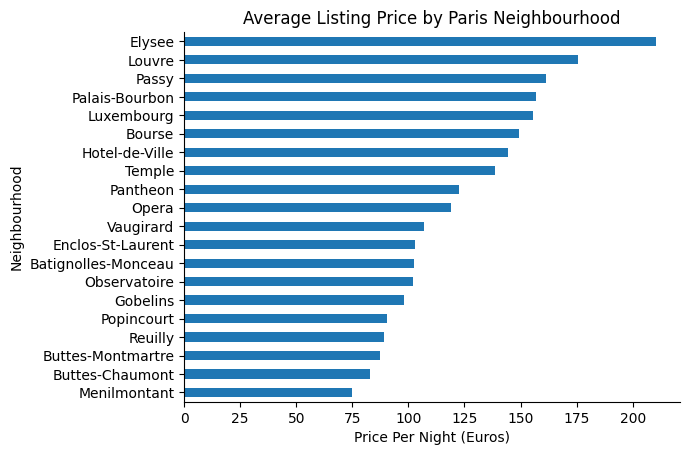

In [36]:
import seaborn as sns 
#Create a horizontal bar chart of the average price by neighborhood in Paris, and make sure to add a title and change axis labels as needed
(paris_listings_neighbourhood
 .plot
 .barh(title = "Average Listing Price by Paris Neighbourhood",
       xlabel = "Price Per Night (Euros)",
       ylabel = "Neighbourhood", 
       legend =None))
sns.despine()

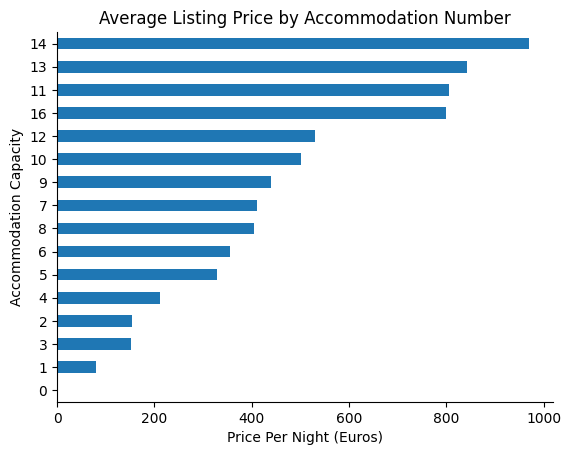

In [37]:
#Create a horizontal bar chart of the average price by accommodations in Paris, and make sure to add a title and change axis labels as needed
(paris_listings_accommodates
 .plot
 .barh(title = "Average Listing Price by Accommodation Number",
       xlabel = "Price Per Night (Euros)",
       ylabel = "Accommodation Capacity", 
       legend =None))
sns.despine()

<Axes: title={'center': 'New AirBnb Hosts In Paris Over Time'}, xlabel='host_since', ylabel='New Hosts'>

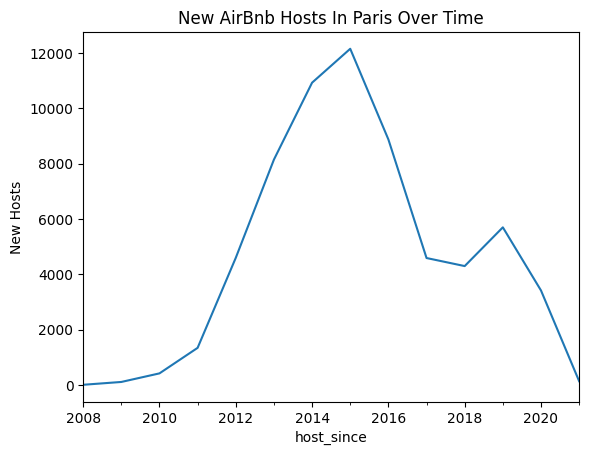

In [38]:
#Create two line charts: one showing the count of new hosts over time, and one showing average price. Set the y-axis limit to 0, add a title
paris_listing_over_time["neighbourhood"].plot( 
    ylabel = "New Hosts", 
    title = "New AirBnb Hosts In Paris Over Time"
)

<Axes: title={'center': 'Average AirBnb Price In Paris Over Time'}, xlabel='host_since', ylabel='Average Price [Euros]'>

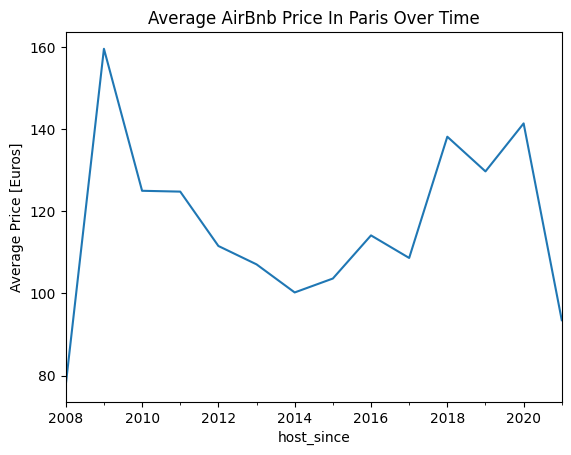

In [39]:
#Based on your findings, what insights do you have about the impact of the 2015 regulations on new hosts and prices?
paris_listing_over_time["price"].plot( 
    ylabel = "Average Price [Euros]", 
    title = "Average AirBnb Price In Paris Over Time"
)

Text(0, 0.5, 'Average Price')

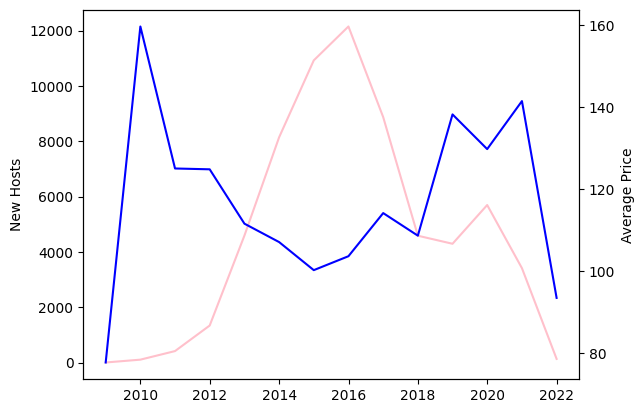

In [42]:
#BONUS: Create a dual axis line chart to show both new hosts and average price over time
import matplotlib.pyplot as plt 

fig, ax = plt.subplots()

ax.plot(
    paris_listing_over_time.index, 
    paris_listing_over_time["neighbourhood"], 
    label = "New Hosts", 
    c="pink"
)

ax.set_ylabel("New Hosts")
ax2 = ax.twinx()

ax2.plot(
    paris_listing_over_time.index, 
    paris_listing_over_time["price"], 
    label = "Average Price", 
    c="blue"
)
ax2.set_ylabel("Average Price")
